In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/extenciones')
from extenciones import Utils2 as ut

In [2]:
data = ut.load_from_csv( ut , "data_exploratoria.csv")
mediciones = data.copy(deep = True)
#dataEXP = data.copy(deep = True)
mediciones = mediciones.drop(columns = ["Unnamed: 0"], axis=1)


In [31]:
mediciones['Total Charges'] = pd.to_numeric(mediciones['Total Charges'], errors='coerce')
filtroprueba = mediciones.drop(mediciones[mediciones["Tenure Months"] <= 25].index )
filtroprueba.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

<AxesSubplot: xlabel='Churn Score', ylabel='Tenure Months'>

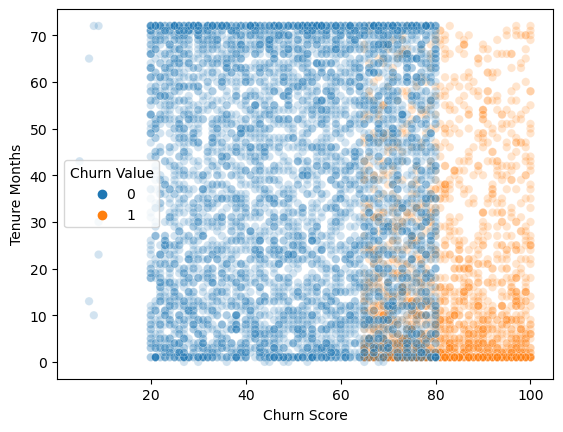

In [4]:
sns.scatterplot(data = mediciones , alpha = .2 , x = mediciones["Churn Score"], 
y =mediciones["Tenure Months"] ,  hue = "Churn Value")

In [24]:
date = pd.get_dummies(mediciones ,columns = ["Payment Method"], drop_first= False)
date = date.drop(date[date["Churn Value"] == 0].index)
date.shape

(1869, 27)

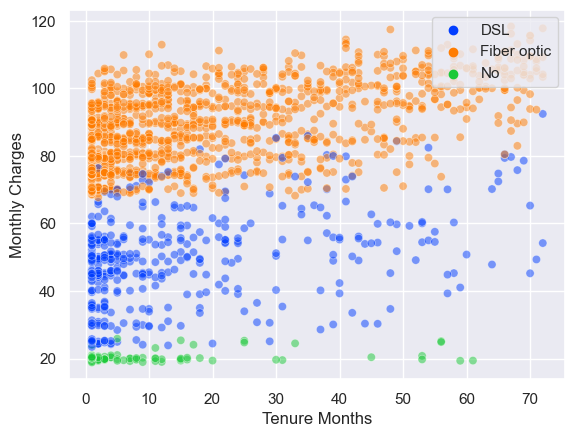

In [32]:

plt.plot()
sns.set()
sns.scatterplot(data = date , alpha = .5 , x = date["Tenure Months"], 
y =mediciones["Monthly Charges"] ,  hue = "Internet Service", legend= True ,
palette="bright")

plt.legend(loc='upper right')
plt.show()


In [ ]:

plt.plot()
sns.set()
sns.scatterplot(data = date , alpha = .5 , x = date["Tenure Months"], 
y =mediciones["Monthly Charges"] ,  hue = "Fiber ", legend= True ,
palette="bright")

plt.legend(loc='upper right')
plt.show()


In [6]:
filtroprueba["CLTV"].describe()

count    3754.000000
mean     4722.379062
std      1104.313645
min      2004.000000
25%      4118.250000
50%      4870.000000
75%      5577.750000
max      6500.000000
Name: CLTV, dtype: float64

<AxesSubplot: xlabel='Tenure Months', ylabel='CLTV'>

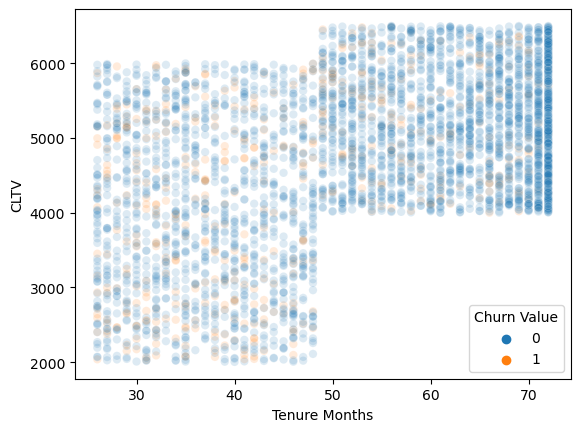

In [10]:
sns.scatterplot(data = mediciones , alpha = .15 , x = filtroprueba["Tenure Months"],
y =filtroprueba["CLTV"] ,  
hue = "Churn Value"
)

In [11]:
filtroprueba["Tenure Months"].describe()

count    3754.000000
mean       52.445392
std        14.757235
min        26.000000
25%        40.000000
50%        54.000000
75%        67.000000
max        72.000000
Name: Tenure Months, dtype: float64